In [1]:
pip install beautifulsoup4

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install beautifulsoup4 requests


Note: you may need to restart the kernel to use updated packages.


In [6]:
import requests

In [15]:
import pandas as pd

In [16]:
from bs4 import BeautifulSoup

In [17]:
url = "http://books.toscrape.com"

In [18]:
# Send a GET request
response = requests.get(url)

In [19]:
# Parse the HTML
soup = BeautifulSoup(response.text, 'html.parser')

In [36]:
book_data=[]

In [37]:
 #Find all book containers
books = soup.find_all('article', class_='product_pod')

In [38]:
for book in books:
    title = book.h3.a['title']
    price = book.find('p', class_='price_color').text
    print(f"Title: {title}\nPrice: {price}\n")
    book_data.append({"Title":title,"Price":price})

Title: A Light in the Attic
Price: Â£51.77

Title: Tipping the Velvet
Price: Â£53.74

Title: Soumission
Price: Â£50.10

Title: Sharp Objects
Price: Â£47.82

Title: Sapiens: A Brief History of Humankind
Price: Â£54.23

Title: The Requiem Red
Price: Â£22.65

Title: The Dirty Little Secrets of Getting Your Dream Job
Price: Â£33.34

Title: The Coming Woman: A Novel Based on the Life of the Infamous Feminist, Victoria Woodhull
Price: Â£17.93

Title: The Boys in the Boat: Nine Americans and Their Epic Quest for Gold at the 1936 Berlin Olympics
Price: Â£22.60

Title: The Black Maria
Price: Â£52.15

Title: Starving Hearts (Triangular Trade Trilogy, #1)
Price: Â£13.99

Title: Shakespeare's Sonnets
Price: Â£20.66

Title: Set Me Free
Price: Â£17.46

Title: Scott Pilgrim's Precious Little Life (Scott Pilgrim #1)
Price: Â£52.29

Title: Rip it Up and Start Again
Price: Â£35.02

Title: Our Band Could Be Your Life: Scenes from the American Indie Underground, 1981-1991
Price: Â£57.25

Title: Olio
Price

In [39]:
df=pd.DataFrame(book_data)
print(df)

                                                Title    Price
0                                A Light in the Attic  Â£51.77
1                                  Tipping the Velvet  Â£53.74
2                                          Soumission  Â£50.10
3                                       Sharp Objects  Â£47.82
4               Sapiens: A Brief History of Humankind  Â£54.23
5                                     The Requiem Red  Â£22.65
6   The Dirty Little Secrets of Getting Your Dream...  Â£33.34
7   The Coming Woman: A Novel Based on the Life of...  Â£17.93
8   The Boys in the Boat: Nine Americans and Their...  Â£22.60
9                                     The Black Maria  Â£52.15
10     Starving Hearts (Triangular Trade Trilogy, #1)  Â£13.99
11                              Shakespeare's Sonnets  Â£20.66
12                                        Set Me Free  Â£17.46
13  Scott Pilgrim's Precious Little Life (Scott Pi...  Â£52.29
14                          Rip it Up and Start Again  

In [49]:
df['Price'] = df['Price'].str.replace('Â£', '').astype(float)

In [50]:
df['PriceInRupees'] = df['Price'] * 105  # adjust the rate if needed


In [51]:
print(df)

                                                Title  Price  PriceInRupees
0                                A Light in the Attic  51.77        5435.85
1                                  Tipping the Velvet  53.74        5642.70
2                                          Soumission  50.10        5260.50
3                                       Sharp Objects  47.82        5021.10
4               Sapiens: A Brief History of Humankind  54.23        5694.15
5                                     The Requiem Red  22.65        2378.25
6   The Dirty Little Secrets of Getting Your Dream...  33.34        3500.70
7   The Coming Woman: A Novel Based on the Life of...  17.93        1882.65
8   The Boys in the Boat: Nine Americans and Their...  22.60        2373.00
9                                     The Black Maria  52.15        5475.75
10     Starving Hearts (Triangular Trade Trilogy, #1)  13.99        1468.95
11                              Shakespeare's Sonnets  20.66        2169.30
12          

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\varsh\AppData\Local\Temp\ipykernel_19780\748938890.py:10: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


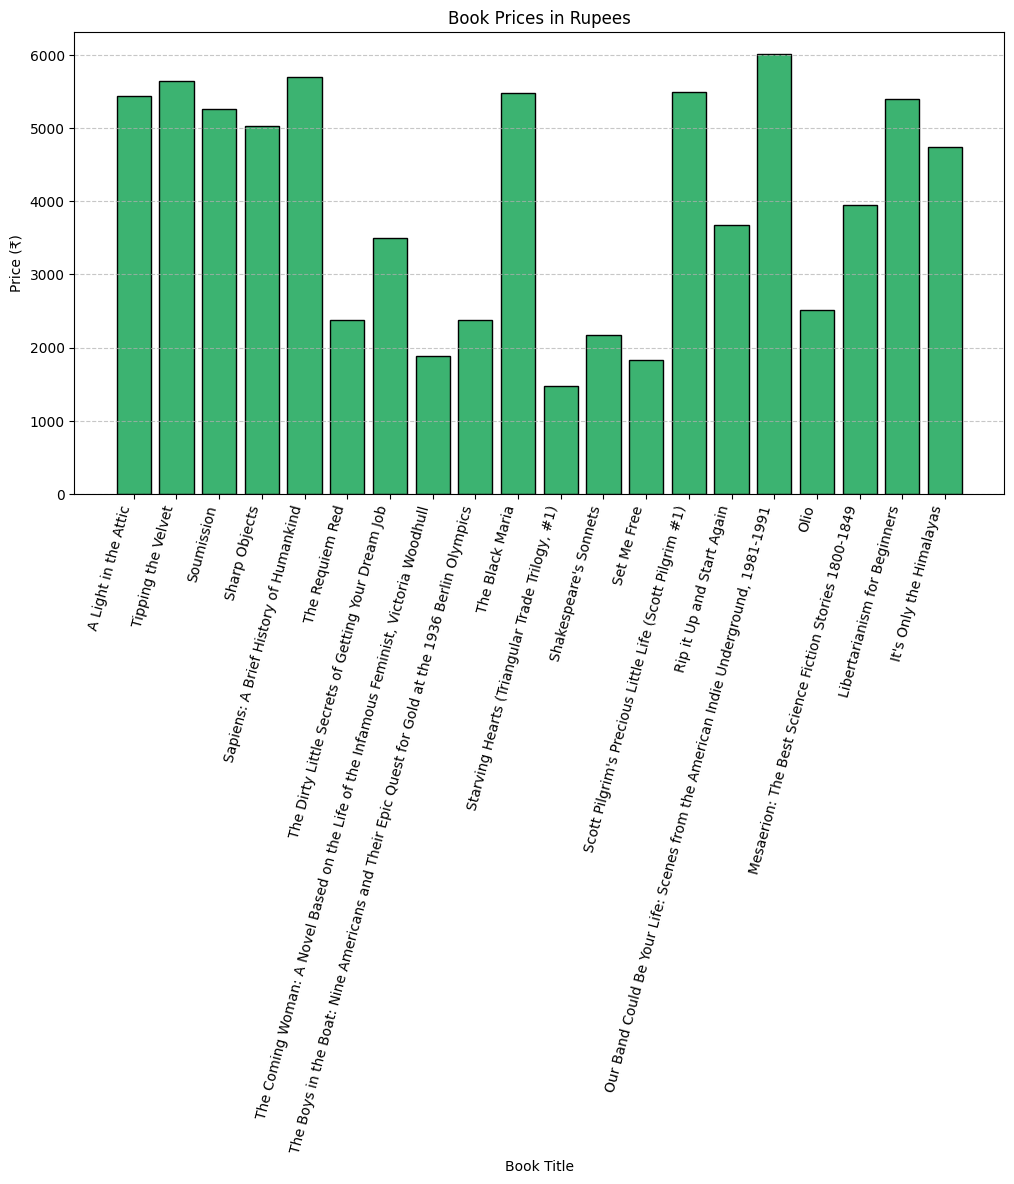

In [52]:
plt.figure(figsize=(12,6))
plt.bar(df['Title'], df['PriceInRupees'], color='mediumseagreen', edgecolor='black')

plt.title('Book Prices in Rupees')
plt.xlabel('Book Title')
plt.ylabel('Price (₹)')
plt.xticks(rotation=75, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()